This tutorial will setup the necessary system for running a simple graphene.

In [1]:
import sisl
import sisl.viz
import numpy as np
import matplotlib.pyplot as plt

Instead of manually defining the graphene system with associated atomic coordinates and lattice vectors we use the build-in `sisl` capability of defining the graphene structure with a default atomic distance of $d = 1.42\,A$.

In [2]:
graphene = sisl.geom.graphene()

In [3]:
help(sisl.geom.graphene)

Help on function graphene in module sisl.geom.flat:

graphene(bond=1.42, atoms=None, orthogonal=False)
    Graphene lattice with 2 or 4 atoms per unit-cell, latter orthogonal cell
    
    Parameters
    ----------
    bond : float
        bond length between atoms (*not* lattice constant)
    atoms : Atom, optional
        the atom (or atoms) that the honeycomb lattice consists of.
        Default to Carbon atom.
    orthogonal : bool, optional
        if True returns an orthogonal lattice
    
    See Also
    --------
    honeycomb: the equivalent of this, but with non-default atoms
    bilayer: create bilayer honeycomb lattices



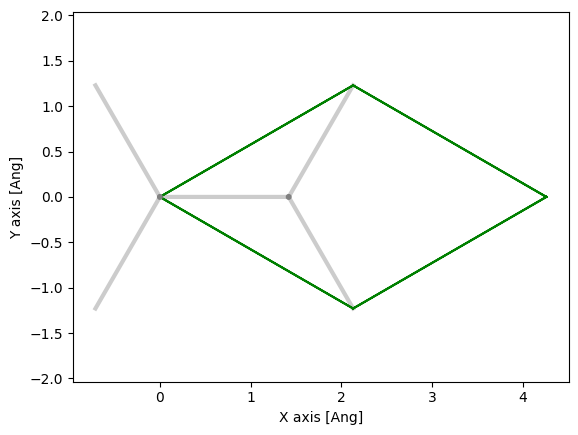

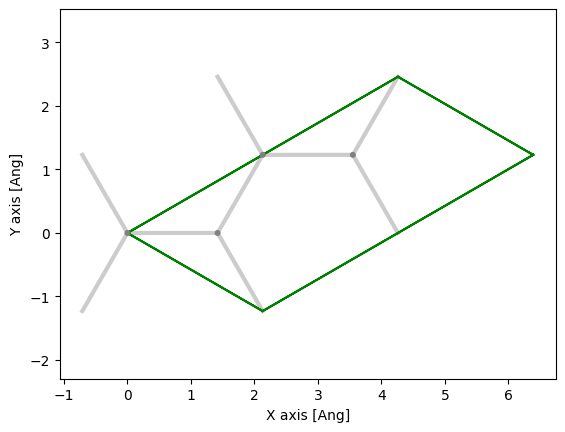

In [6]:
p1 = graphene.plot(axes='xy')
p2 = graphene.tile(2,1).plot(axes='xy')

In [8]:
print(graphene)

Geometry{na: 2, no: 2,
 Atoms{species: 1,
  Atom{C, Z: 6, mass(au): 12.01070, maxR: 1.43420,
   Orbital{R: 1.43420, q0: 0.0}
  }: 2,
 },
 maxR: 1.43420,
 SuperCell{nsc: [3 3 1],
  A=[2.130, -1.230, 0.000],
  B=[2.130, 1.230, 0.000],
  C=[0.000, 0.000, 14.200],
 }
}


Some basic information of the geometry is shown above:

1. It contains 2 atoms, `na` is *number of atoms*
2. It contains 2 orbitals, `no` is *number of orbitals*
3. Then there is a list of unique atoms associated. In this case there is 1 unqiue specie, `species: 1` while the subsequent lines specifies the number of times it is occuring in the `Geometry`. 
4. `nsc` specifies the *number of supercells* which is a practical way of dealing with periodic structures.
In this case we have periodicity along the first and second lattice vector. And there are 3 images along each of these directions. The primary, and one at $+$ and $-$. It should be apparent that the values in `nsc` are **always** uneven numbers. Note that for molecules it is always `[1, 1, 1]`.
5. The last item, `maxR` is the maximal orbital range in the geometry. In this case it is equal to `maxR` as listed for the atomic Carbon specie. However, in case there are more than one specie it will be the maximum for the individual species.

Now we are ready to proceed with creating the Hamiltonian for the graphene lattice. But before doing so you should now consider which type of system we are going towards? Are we going to implement a nearest, next nearest or third nearest neighbour interaction?  
*HINT*: this should be apparent from the `maxR` variable above.

In [9]:
H = sisl.Hamiltonian(graphene)
print(H)

Hamiltonian{non-zero: 0, orthogonal: True,
 Spin{unpolarized, kind=f},
 Geometry{na: 2, no: 2,
  Atoms{species: 1,
   Atom{C, Z: 6, mass(au): 12.01070, maxR: 1.43420,
    Orbital{R: 1.43420, q0: 0.0}
   }: 2,
  },
  maxR: 1.43420,
  SuperCell{nsc: [3 3 1],
   A=[2.130, -1.230, 0.000],
   B=[2.130, 1.230, 0.000],
   C=[0.000, 0.000, 14.200],
  }
 }
}


Now `H` is a Hamiltonian object. It works *equivalently* to a matrix and one may assign elements and extract elements as though it were a matrix, we will return to the intricate details of the Hamiltonian object later.

There are only 3 more things that specifies the Hamiltonian. 
1. `non-zero` is the current number of non zero elements specified in the Hamiltonian
2. `orthogonal` specifies whether an overlap matrix is associated with the Hamiltonian, i.e. `False` for a non-orthogonal basis-set.
3. The number of spin-components are specified via the `Spin` class which in this case is an unpolarized system. I.e. only one spin-component.
4. The `Geometry` class is repeated because the Hamiltonian is associated with the `Geometry` passed when instantiating the Hamiltonian (`sisl.Hamiltonian(graphene)`).

You are now ready to add matrix elements to the Hamilton.

### Explicilty specifying the matrix elements

In this small sub-section we will specify the required matrix elements manually. You should already now know that we only plan on adding nearest neighbour interactions.

We will proceed with an on-site of $0\,\mathrm{eV}$ and a coupling element of $t=-2.7\,\mathrm{eV}$.  
First we set the on-site elements:

In [10]:
H[0, 0] = 0.0
H[1, 1] = 0.0

Now we need to set the coupling elements:

In [11]:
H[0, 1] = -2.7
H[1, 0] = -2.7

In [12]:
print(H)

Hamiltonian{non-zero: 4, orthogonal: True,
 Spin{unpolarized, kind=f},
 Geometry{na: 2, no: 2,
  Atoms{species: 1,
   Atom{C, Z: 6, mass(au): 12.01070, maxR: 1.43420,
    Orbital{R: 1.43420, q0: 0.0}
   }: 2,
  },
  maxR: 1.43420,
  SuperCell{nsc: [3 3 1],
   A=[2.130, -1.230, 0.000],
   B=[2.130, 1.230, 0.000],
   C=[0.000, 0.000, 14.200],
  }
 }
}


This will only couple the first and second atom in the primary unit-cell. But we also require couplings from the primary unit-cell to the neighbouring supercells. Remember that `nsc = [3, 3, 1]`.  
In this case we know that the first atom couples to the `(-1, 0)` and `(0, -1)`, while the second atom couples to `(1, 0)` and `(0, 1)`.  
The coupling elements may then be specified via:

In [13]:
H[0, 1, (-1, 0)] = -2.7
H[0, 1, (0, -1)] = -2.7
H[1, 0, (1, 0)] = -2.7
H[1, 0, (0, 1)] = -2.7

Now all matrix elements are set, i.e. 2 on-site and 6 nearest neighbour couplings, lets assert this:

In [14]:
print(H)

Hamiltonian{non-zero: 8, orthogonal: True,
 Spin{unpolarized, kind=f},
 Geometry{na: 2, no: 2,
  Atoms{species: 1,
   Atom{C, Z: 6, mass(au): 12.01070, maxR: 1.43420,
    Orbital{R: 1.43420, q0: 0.0}
   }: 2,
  },
  maxR: 1.43420,
  SuperCell{nsc: [3 3 1],
   A=[2.130, -1.230, 0.000],
   B=[2.130, 1.230, 0.000],
   C=[0.000, 0.000, 14.200],
  }
 }
}


We find 8 non-zero elements, as there should be. Remark, even though we set the on-site terms to $0$, they are interpreted as non-zero elements due to explicitly setting them.

After having setup the Hamilton, we may easily calculate the eigenvalues at any $\mathbf k$ (in reduced coordinates $\mathbf k\in]-0.5:0.5]$).

In [15]:
print("Gamma:", H.eigh())
print("K:", H.eigh(k=[2./3,1./3,0]))

Gamma: [-8.1  8.1]
K: [-9.93013661e-16  9.93013661e-16]


### Looping the atoms and orbitals in the Hamiltonian

The above specification of the elements is tedious for anything with more elements than 2 orbitals. There are easier and better ways to set all the coupling elements.  
In the following we will introduce a new function:
 
     Geometry.close

which is a *very* convenient function to return all atomic indices within a certain radii from a given coordinate.

In [13]:
for ia, io in H.geometry.iter_orbitals(local=False):
    # This loops over all atoms and the orbitals
    # corresponding to the atom.
    # In this case the geometry has one orbital per atom, hence
    #   ia == io
    # in all cases.
    
    # In order to figure out which atoms atom `ia` is connected
    # to, we must find those atoms.
    # To do this we access the geometry attached to the 
    # Hamiltonian (H.geom)
    # and use a function called `close` which returns ALL 
    # atomic indices within certain ranges of a given point or atom
    idx = H.geometry.close(ia, R = [0.1, 1.43])
    # the argument R has two entries:
    #   0.1 and 1.43
    # Each value represents a radii of a sphere.
    # The `close` function will then return
    # a list of equal length of the R argument (i.e. a list with
    # two values).
    # idx[0] is the first element and is also a list
    # of all atoms within a sphere of 0.1 AA of atom `ia`.
    # This should obviously only contain the atom it-self.
    # The second element, idx[1], contains all atoms within a sphere
    # with radius of 1.43 AA, but not including those within 0.1 AA.
    # In this case this is then all atoms that are the nearest neighbour
    # atoms.
   
    # Now we know the on-site atoms (idx[0]) and the nearest neighbour
    # atoms (idx[1]), all we need to do is set the Hamiltonian
    # elements:

    # on-site (0. eV)
    H[io, idx[0]] = 0.
   
    # nearest-neighbour (-2.7 eV)
    H[io, idx[1]] = -2.7

The above loop is equivalent to the previously explicitly set values, so printing the structure will yield the same information, we have just specified all values again.  
The above loop is also *only* 4 lines of code, irrespective of the number of atoms in the geometry.

In [14]:
print(H)

Hamiltonian{non-zero: 8, orthogonal: True,
 Spin{unpolarized, kind=f},
 Geometry{na: 2, no: 2,
  Atoms{species: 1,
   Atom{C, Z: 6, mass(au): 12.01070, maxR: 1.43420,
    Orbital{R: 1.43420, q0: 0.0}
   }: 2,
  },
  maxR: 1.43420,
  SuperCell{nsc: [3 3 1],
   A=[2.130, -1.230, 0.000],
   B=[2.130, 1.230, 0.000],
   C=[0.000, 0.000, 14.200],
  }
 }
}


After having setup the Hamilton, we may easily calculate the eigenvalues at any $\mathbf k$ (in reduced coordinates $\mathbf k\in]-0.5:0.5]$).

In [15]:
print("Gamma:", H.eigh())
print("K:", H.eigh(k=[2./3,1./3,0]))

Gamma: [-8.1  8.1]
K: [-9.93013661e-16  9.93013661e-16]


We may also create a bandstructure of the Hamiltonian.  
First we define the path we wish to take in the Brillouin zone. Start at $\Gamma$, continue to $K$, then $M$ and finish where we started.  
We will calculate the band-structure with a total of `301` points and we explicitly name the special points.

In [16]:
band = sisl.BandStructure(H, [[0., 0.], [2./3, 1./3],
                              [1./2, 1./2], [1., 1.]], 301,
                              [r'$\Gamma$', 'K', 'M', r'$\Gamma$'])
eigs = band.apply.array.eigh()

Now `eigs` contains all the eigenvalues of the Hamiltonian object for all the $k$-points.

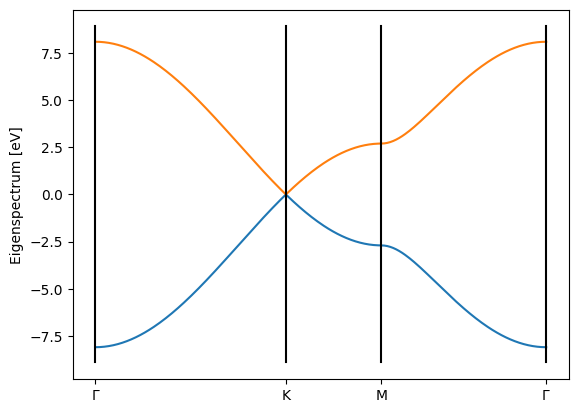

In [17]:
# Retrieve the tick-marks and the linear k points
xtick, xtick_label = band.lineartick()
lk = band.lineark()
plt.plot(lk, eigs)

plt.ylabel('Eigenspectrum [eV]')
plt.gca().xaxis.set_ticks(xtick)
plt.gca().set_xticklabels(xtick_label)

# Also plot x-major lines at the ticks
ymin, ymax = plt.gca().get_ylim()
for tick in xtick:
    plt.plot([tick,tick], [ymin,ymax], 'k')

## Exercises

- Go back to `In [6]` and define a potential difference between the two atoms (sub-lattices, difference should be more than `0.5 eV`).
   What happens to the band structure?
- Change the hopping element.
   What happens to the band structure?
- Learn how to use `Geometry.close`. Determine the number of indices returned by the 4 below calls, and why?. It may help to draw the graphene lattice of the geometry on a piece of paper.

    1. Do 3 `close` calls at coordinate $(1, 0, 0)$ for 3 different radius, $R \in \{0.5, 1.45, 1.7\}$ (`R = 0.5`...).  
    2. Do 1 `close` call at coordinate $(1, 0, 0)$ for 3 different radius, `R = [0.5, 1.45, 1.7]`.
         Note, that in this case a list of 3 lists are returned (one per radius).

## Learned lessons

- Usage of `sisl.geom` class to create default geometries
- Creation of a Hamiltonian object (`Hamiltonian`)
- Assigning elements to the Hamiltonian matrix
- Retrieving atoms within spherical radius of points or atomic indices (`Geometry.close`)
- Creating a band-structure `BandStructure`